In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import numpy
import matplotlib.pyplot as plt
from multiprocessing import Pool
from time import time

In [2]:
# Define experiments given the number of candidates and the selection rule
def sim(na):
    n = na[0]
    a = na[1]
    x = numpy.random.random(n)
    opt = max(x)
    mx = 0
    for i in range(n):
        if i < a:
            mx = max(mx, x[i])
        elif x[i] > mx:
            return (x[i], opt)
    return (x[n - 1], opt)

def mult_sim(mn):
    m = mn[0]
    n = mn[1]
    c = [0] * n
    for i in range(m):
        for j in range(n):
            exp = sim((n, j))
            if exp[0] == exp[1]:
                c[j] += 1
    return c
    
print("DONE")

DONE


12.905358791351318


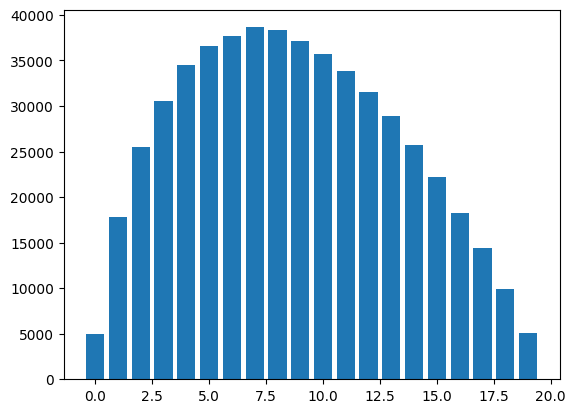

In [3]:
# Run some experiments sequentially
n = 20
t0 = time()
c = mult_sim((100000, n))
t1 = time()
plt.bar(range(n), c)
print(t1 - t0)

5.732043027877808


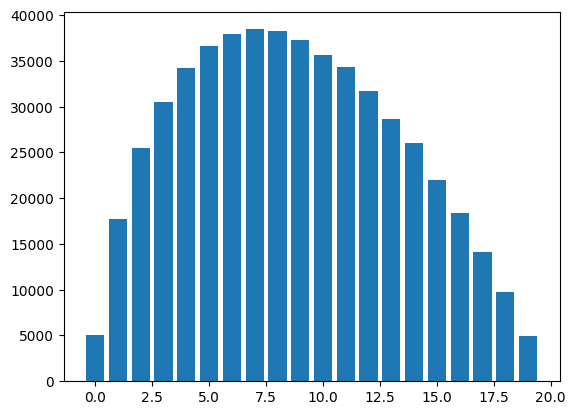

In [4]:
# Run the processes in parallel
# sim.py contains the same sim and mult_sim functions
import sim
with Pool(10) as p:
    t0 = time()
    c = p.map(sim.mult_sim, [(10000, n)] * 10)
    t1 = time()
    plt.bar(range(n), numpy.sum(c, axis = 0))
    print(t1 - t0)